## Tkinter GUI

In [1]:
from tkinter import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#sale input is saved in dictionary
root = Tk()
root.title("Sales Forecasting Device")

NavBarLabel = Label(root, bg="gray", padx=90, text="Sales Forecasting Device")
NavBarLabel.grid(row=0, column=0, columnspan = 2)


InputSalesLabel = Label(root, text="Input every Month's Sales")
InputSalesLabel.grid(row=1, column=0, columnspan = 2)
#############################################################################

# Data
data = {
    'Months': ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Year_Sales': ['-','-','-','-','-','-','-','-','-','-','-','-']
}
df = pd.DataFrame(data= data)
############################################################################

#Validates Inputs of Sales if its integer
def SaleValidate():
    try:
        for i in range(len(df["Year_Sales"])):
            MonthsInputGetter = (d["MonthsInput{0}".format(i)]).get()
            df["Year_Sales"][i] = float(MonthsInputGetter)
    
    except ValueError:
        InputError = Label(root, text="Input a correct number \n(not a string or a negative number)", fg="red", bg="lightgray")
        InputError.grid(row= 15, column=0, columnspan = 2)

    #if input is left empty
#     if MonthsInput.get() == '':
#         InputError.config(text=" ")
#         InputMissing = Label(root, text="Please Input all fields", fg="red", bg="lightgray")
#         InputMissing.grid(row= 15, column=0, columnspan = 2)

    

#Displays the Months and Input Text
rowStart = 1
columnStart = 0
d = {}

for i in range(len(df["Months"])):
    
    rowStart = rowStart + 1
    MonthsLabel = Label(root, text= df["Months"][i])
    MonthsLabel.grid(row= rowStart+1, column = columnStart)

    d["MonthsInput{0}".format(i)] = Entry(root)
    d["MonthsInput{0}".format(i)].grid(row= rowStart+1, column = columnStart+1)

    
#Submit Button
SubmitButton = Button(root, text="Submit", command=SaleValidate)
SubmitButton.grid(row= 16, column=0, columnspan = 2, pady=10)


#############################################################################
root.geometry("300x375")

root.mainloop()

In [82]:
#every sale input is saved in its own variable (just wanted to learn how to do it)
root = Tk()
root.title("Sales Forecasting Device")

NavBarLabel = Label(root, bg="gray", padx=90, text="Sales Forecasting Device")
NavBarLabel.grid(row=0, column=0, columnspan = 2)


InputSalesLabel = Label(root, text="Input every Month's Sales")
InputSalesLabel.grid(row=1, column=0, columnspan = 2)
#############################################################################

# Data
data = {
    'Months': ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Year_Sales': ['-','-','-','-','-','-','-','-','-','-','-','-']
}
df = pd.DataFrame(data= data)
############################################################################

#Validates Inputs of Sales if its integer
def SaleValidate():
    try:
        df["Year_Sales"][0] = float(MonthsInput0.get())
        df["Year_Sales"][1] = float(MonthsInput1.get())
        df["Year_Sales"][2] = float(MonthsInput2.get())
        df["Year_Sales"][3] = float(MonthsInput3.get())
        df["Year_Sales"][4] = float(MonthsInput4.get())
        df["Year_Sales"][5] = float(MonthsInput5.get())
        df["Year_Sales"][6] = float(MonthsInput6.get())
        df["Year_Sales"][7] = float(MonthsInput7.get())
        df["Year_Sales"][8] = float(MonthsInput8.get())
        df["Year_Sales"][9] = float(MonthsInput9.get())
        df["Year_Sales"][10] = float(MonthsInput10.get())
        df["Year_Sales"][11] = float(MonthsInput11.get())

    except ValueError:
        InputError = Label(root, text="Input a correct number \n(not a string or a negative number)", fg="red", bg="lightgray")
        InputError.grid(row= 15, column=0, columnspan = 2)

    #if input is left empty
#     if MonthsInput.get() == '':
#         InputError.config(text=" ")
#         InputMissing = Label(root, text="Please Input all fields", fg="red", bg="lightgray")
#         InputMissing.grid(row= 15, column=0, columnspan = 2)

    

#Displays the Months and Input Text
rowStart = 1
columnStart = 0

for i in range(len(df["Months"])):
    
    rowStart = rowStart + 1
    MonthsLabel = Label(root, text= df["Months"][i])
    MonthsLabel.grid(row= rowStart+1, column = columnStart)
#     MonthsInput = Entry(root)
#     MonthsInput.grid(row= rowStart+1, column = columnStart+1)
    locals()["MonthsInput"+str(i)] = Entry(root)
    locals()["MonthsInput"+str(i)].grid(row= rowStart+1, column = columnStart+1)

    
#Submit Button
SubmitButton = Button(root, text="Submit", command=SaleValidate)
SubmitButton.grid(row= 16, column=0, columnspan = 2, pady=10)


#############################################################################
root.geometry("300x375")

root.mainloop()

## Backend without GUI 

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
data = {
    'Months': ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Year_Sales': ['-','-','-','-','-','-','-','-','-','-','-','-']
}

In [134]:
df = pd.DataFrame(data= data)
df

,Months,Year_Sales
0,January,-
1,February,-
2,March,-
3,April,-
4,May,-
5,June,-
6,July,-
7,August,-
8,September,-
9,October,-


In [135]:
for i in range(12): 
    intcheck = False
    while intcheck == False:
        print("Enter", df["Months"][i], end=" ")
        try:
            userInput = int(input("Sales: "))
        except ValueError:
            print('Thats the wrong numba')
        else:
            intcheck = True
            df["Year_Sales"][i] = userInput

Enter January Sales: 536
Enter February Sales: 626
Enter March Sales: 157
Enter April Sales: 659
Enter May Sales: 294
Enter June Sales: 468
Enter July Sales: 478
Enter August Sales: 512
Enter September Sales: 690
Enter October Sales: 149
Enter November Sales: 111
Enter December Sales: 740


In [136]:
df

,Months,Year_Sales
0,January,536
1,February,626
2,March,157
3,April,659
4,May,294
5,June,468
6,July,478
7,August,512
8,September,690
9,October,149


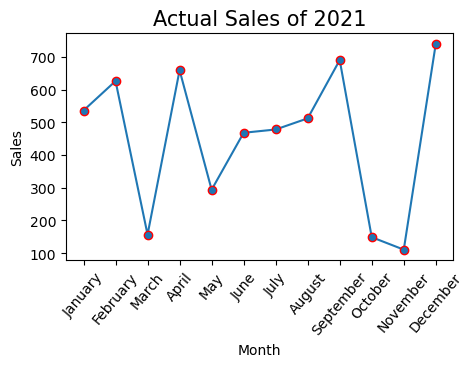

In [137]:
x= np.array([0,1,2,3,4,5,6,7,8,9,10,11])

plt.figure(figsize=(5,3), dpi=100)
plt.plot(df["Year_Sales"], marker=".", markersize="12", markeredgecolor="red", label="Actual Sales")
plt.xticks(x,df["Months"], rotation=50)

plt.title("Actual Sales of 2021", fontdict={"fontsize": 15})
plt.xlabel("Month")
plt.ylabel("Sales")

plt.show()

## Naive

In [138]:
df["Naive_Forcast"] = df["Year_Sales"]
df

,Months,Year_Sales,Naive_Forcast
0,January,536,536
1,February,626,626
2,March,157,157
3,April,659,659
4,May,294,294
5,June,468,468
6,July,478,478
7,August,512,512
8,September,690,690
9,October,149,149


### Make temp df for Naive graph

In [139]:
temp_df = df.copy()

In [140]:
for i in range(len(df.index)):
    temp_df.loc[len(temp_df.index)] = [temp_df["Months"][i], temp_df["Year_Sales"][i], temp_df["Naive_Forcast"][i]]

In [141]:
temp_df

,Months,Year_Sales,Naive_Forcast
0,January,536,536
1,February,626,626
2,March,157,157
3,April,659,659
4,May,294,294
5,June,468,468
6,July,478,478
7,August,512,512
8,September,690,690
9,October,149,149


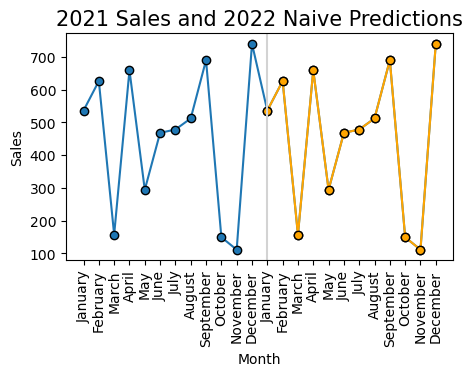

In [142]:
x= np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

plt.figure(figsize=(5,3), dpi=100)

#Changes Color after prediction
ax = temp_df['Year_Sales'].plot(marker=".", markersize="12", markeredgecolor="black", label="Actual Sales")
temp_df.loc[temp_df.index >= 12, "Year_Sales"].plot(color='orange', marker=".", markersize="12", markeredgecolor="black", ax=ax)

ax.axvline(x=12, color='lightgray')

plt.xticks(x,temp_df["Months"], rotation=90)

plt.title("2021 Sales and 2022 Naive Predictions", fontdict={"fontsize": 15})
plt.xlabel("Month")
plt.ylabel("Sales")

plt.show()

In [143]:
#delete columns and rows after being done
del temp_df["Naive_Forcast"]
temp_df.drop(range(12,24),axis=0,inplace=True)

## Moving Average

In [144]:
def MA_value(value):
  while True:
    try:
       MA_val = int(input(value))       
    except ValueError:
       print("Not an integer! Try again.")
       continue
    if MA_val >= 12:
        print("Enter a smaller Number (Between 1 - 11)")
        continue
    else:
       return MA_val 
       break 
     
MA_val = MA_value("Enter a number of Months \n for Moving Average (1 - 11): ")

Enter a number of Months 
 for Moving Average (1 - 11): 4


In [145]:
df["MA_Forecast"] = df["Year_Sales"].rolling(window=MA_val).mean()
df

,Months,Year_Sales,Naive_Forcast,MA_Forecast
0,January,536,536,NaN
1,February,626,626,NaN
2,March,157,157,NaN
3,April,659,659,494.50
4,May,294,294,434.00
5,June,468,468,394.50
6,July,478,478,474.75
7,August,512,512,438.00
8,September,690,690,537.00
9,October,149,149,457.25


In [146]:
#shifts cells down
df["MA_Forecast"] = df["MA_Forecast"].shift(1)
df

,Months,Year_Sales,Naive_Forcast,MA_Forecast
0,January,536,536,NaN
1,February,626,626,NaN
2,March,157,157,NaN
3,April,659,659,NaN
4,May,294,294,494.50
5,June,468,468,434.00
6,July,478,478,394.50
7,August,512,512,474.75
8,September,690,690,438.00
9,October,149,149,537.00


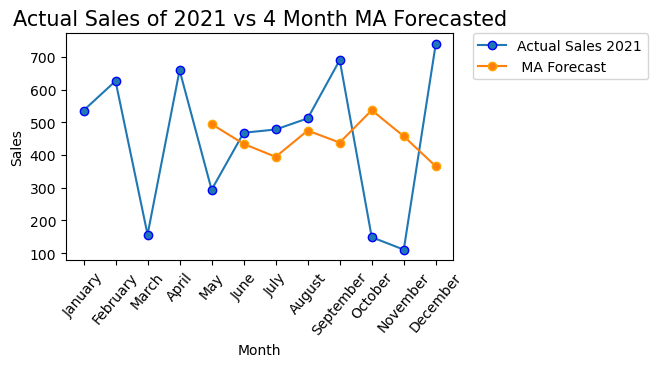

In [147]:
#Moving Average Forecasting Graph
x= np.array([0,1,2,3,4,5,6,7,8,9,10,11])

plt.figure(figsize=(5,3), dpi=100)
plt.plot(df["Year_Sales"], marker=".", markersize="12", markeredgecolor="blue", label="Actual Sales 2021")
plt.plot(df["MA_Forecast"], marker=".", markersize="12", markeredgecolor="orange", label=" MA Forecast")
plt.xticks(x,df.Months, rotation=50)

plt.title(f"Actual Sales of 2021 vs {str(MA_val)} Month MA Forecasted", fontdict={"fontsize": 15})
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# plt.plot(df.Sales_2022)

plt.show()

## Weighted Moving Average

In [148]:
def WMA_value(value):
  while True:
    try:
       WMA_val = int(input(value))       
    except ValueError:
       print("Not an integer! Try again.")
       continue
    if MA_val >= 12:
        print("Enter a smaller Number (Between 1 - 11)")
        continue
    else:
       return MA_val 
       break 
     
WMA_val = MA_value("Enter a number of Months \n for WMA and Weight of each Month before (1 - 11): ")


Enter a number of Months 
 for WMA and Weight of each Month before (1 - 11): 9


In [151]:
weights = []
for i in range(WMA_val):
    print(df["Months"][i], end=" ")
    print("Weight Value ", end=" ")
    weight = float(input(": "))
    weights.append(weight)

January Weight Value  : 0.1
February Weight Value  : 0.2
March Weight Value  : 0.05
April Weight Value  : 0.1
May Weight Value  : 0.05
June Weight Value  : 0.15
July Weight Value  : 0.05
August Weight Value  : 0.15
September Weight Value  : 0.15


In [152]:
weights

[0.1, 0.2, 0.05, 0.1, 0.05, 0.15, 0.05, 0.15, 0.15]

In [153]:
df["WMA_Forecast"] = df["Year_Sales"].rolling(window = WMA_val).apply(lambda x: np.sum(weights*x)/np.sum(weights))
#shifts cells down
df["WMA_Forecast"] = df["WMA_Forecast"].shift(1)
df

,Months,Year_Sales,Naive_Forcast,MA_Forecast,WMA_Forecast
0,January,536,536,NaN,NaN
1,February,626,626,NaN,NaN
2,March,157,157,NaN,NaN
3,April,659,659,NaN,NaN
4,May,294,294,494.50,NaN
5,June,468,468,434.00,NaN
6,July,478,478,394.50,NaN
7,August,512,512,474.75,NaN
8,September,690,690,438.00,NaN
9,October,149,149,537.00,541.65


In [154]:


df

,Months,Year_Sales,Naive_Forcast,MA_Forecast,WMA_Forecast
0,January,536,536,NaN,NaN
1,February,626,626,NaN,NaN
2,March,157,157,NaN,NaN
3,April,659,659,NaN,NaN
4,May,294,294,494.50,NaN
5,June,468,468,434.00,NaN
6,July,478,478,394.50,NaN
7,August,512,512,474.75,NaN
8,September,690,690,438.00,NaN
9,October,149,149,537.00,541.65


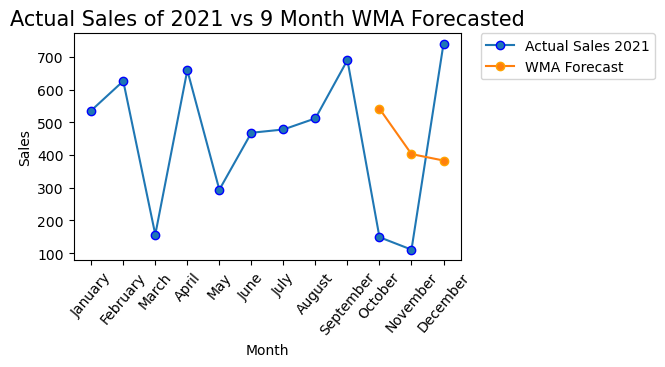

In [155]:
def WMA_Graph():

    #Weighted Moving Average Forecasting Graph
    x= np.array([0,1,2,3,4,5,6,7,8,9,10,11])

    plt.figure(figsize=(5,3), dpi=100)
    plt.plot(df["Year_Sales"], marker=".", markersize="12", markeredgecolor="blue", label="Actual Sales 2021")
    plt.plot(df["WMA_Forecast"], marker=".", markersize="12", markeredgecolor="orange", label="WMA Forecast")
    plt.xticks(x,df.Months, rotation=50)

    plt.title(f"Actual Sales of 2021 vs {str(WMA_val)} Month WMA Forecasted", fontdict={"fontsize": 15})
    plt.xlabel("Month")
    plt.ylabel("Sales")
    plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


    plt.show()

WMA_Graph()

## Exponenial Forecasting

In [160]:
#0.429483326
def EMU_Calc(alpha_input):

    df["ema_Forecast"] = df["Year_Sales"].ewm(alpha = alpha_input, adjust=False).mean()
    print(df["ema_Forecast"])

#call the function
EMU_Calc(float(input("Choose Optimal Alpha: ")))

Choose Optimal Alpha: 1
0     536.0
1     626.0
2     157.0
3     659.0
4     294.0
5     468.0
6     478.0
7     512.0
8     690.0
9     149.0
10    111.0
11    740.0
Name: ema_Forecast, dtype: float64


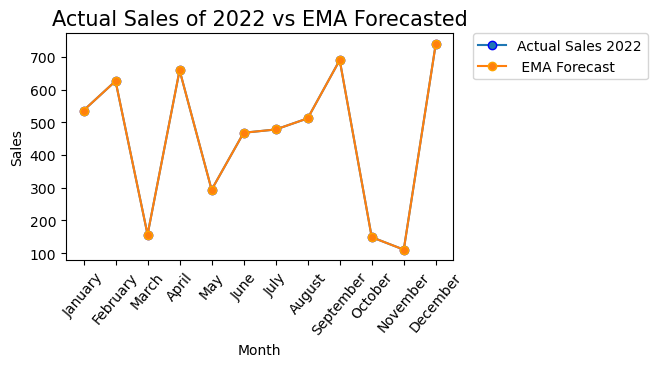

In [161]:
#EMA Forecasting Graph
def EMU_Graph():
    x= np.array([0,1,2,3,4,5,6,7,8,9,10,11])

    plt.figure(figsize=(5,3), dpi=100)
    plt.plot(df["Year_Sales"], marker=".", markersize="12", markeredgecolor="blue", label="Actual Sales 2022")
    plt.plot(df["ema_Forecast"], marker=".", markersize="12", markeredgecolor="orange", label=" EMA Forecast")
    plt.xticks(x,df["Months"], rotation=50)

    plt.title("Actual Sales of 2022 vs EMA Forecasted", fontdict={"fontsize": 15})
    plt.xlabel("Month")
    plt.ylabel("Sales")

    plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    # plt.plot(df.Sales_2022)

    plt.show()

#call the function
EMU_Graph()

In [66]:
#Save CSV
df.to_csv('ToCSV.csv', index=False)